In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("data/pitch_swing.csv")

In [25]:

player_avg_data = df.groupby('player_name').agg(
    avg_swing_length=('swing_length', 'mean'),
    avg_bat_speed=('bat_speed', 'mean'),
    woba_value=('woba_value', 'mean')
).reset_index()

In [26]:

player_avg_data

,player_name,avg_swing_length,avg_bat_speed,woba_value
0,"Abrams, CJ",7.365126,70.224533,0.365176
1,"Abreu, José",6.994067,71.232184,0.177670
2,"Abreu, Wilyer",7.321706,72.818641,0.362255
3,"Acuña Jr., Ronald",7.512827,74.580044,0.329803
4,"Adames, Willy",8.087973,72.580638,0.322585
...,...,...,...,...
554,"Yelich, Christian",7.404644,71.339515,0.381116
555,"Yoshida, Masataka",7.189295,69.138296,0.309426
556,"Young, Jacob",6.515986,63.034302,0.318219
557,"Zavala, Seby",7.185108,65.931641,0.237500


In [27]:
# Create an imputer for filling NaN values with the mean
#Handling missing values
imputer = SimpleImputer(strategy='mean')

In [28]:
X = player_avg_data[['avg_swing_length', 'avg_bat_speed']]
X_imputed = imputer.fit_transform(X)

In [29]:
kmeans = KMeans(n_clusters=4, random_state=0)
player_avg_data['cluster'] = kmeans.fit_predict(X_imputed)

In [30]:
cluster_labels = {
    0: 'Fast and Long',
    1: 'Slow and Short',
    2: 'Average and Short',
    3: 'Average and Long'
}

player_avg_data['cluster_label'] = player_avg_data['cluster'].map(cluster_labels)

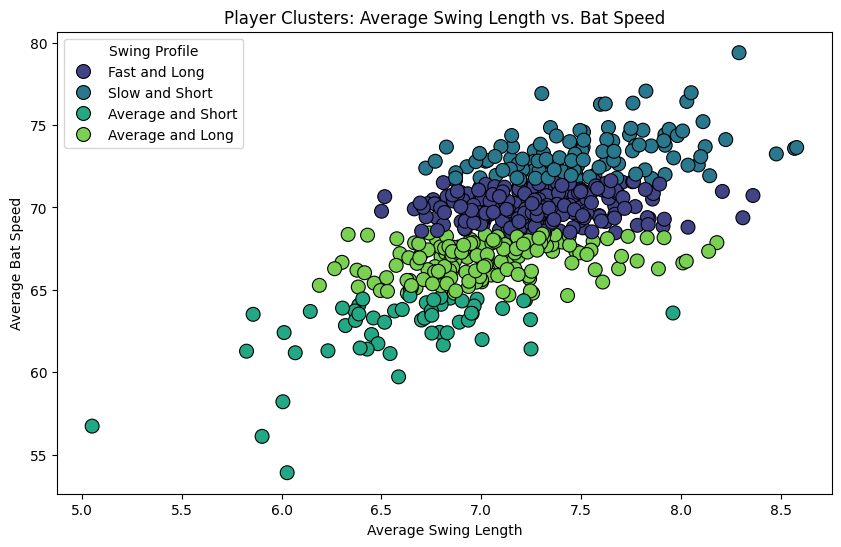

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_avg_data, x='avg_swing_length', y='avg_bat_speed', 
                hue='cluster_label', palette='viridis', s=100, edgecolor='k')

plt.xlabel('Average Swing Length')
plt.ylabel('Average Bat Speed')
plt.title('Player Clusters: Average Swing Length vs. Bat Speed')
plt.legend(title="Swing Profile")
plt.show()